# DBSCAN

## Import Required Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


 ## Load and Explore the Dataset

In [51]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [52]:
# Print dataset shape and a preview of the data
print("Dataset shape:", df.shape)b

Dataset shape: (440, 8)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


##  Pre-process the Data

In [60]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [62]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [67]:
# Select only numeric features (if applicable)
# df_numeric = df.select_dtypes(include=[np.number])
# print("Numeric columns preview:")
# df_numeric.head()

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)
df_numeric.head()
X_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [77]:
# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.9, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Check unique cluster labels (-1 represents noise points)
print("Unique clusters found:", np.unique(clusters))

Unique clusters found: [-1  0  1  2  3]


## Visualize the Clusters

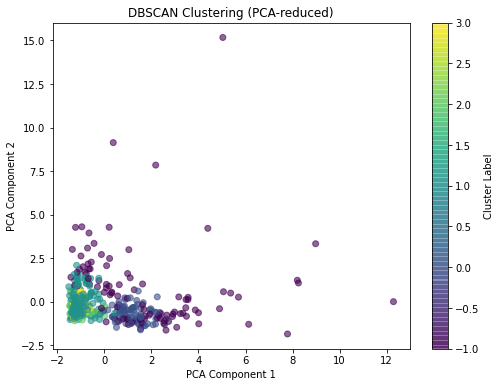

In [78]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Plot the clusters using the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster Label')
plt.show()


In [79]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Define the parameter grid for DBSCAN
param_grid = {
    'eps': [0.3, 0.5, 0.7, 0.9],
    'min_samples': [3, 5, 10]
}

best_score = -1
best_params = None

# Iterate over all parameter combinations
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(X_scaled)  # X_scaled is your standardized features
    
    # Silhouette score is only defined if there are at least 2 clusters
    if len(set(labels)) > 1:
        score = silhouette_score(X_scaled, labels)
        print(f"Params: {params}, Silhouette Score: {score:.4f}")
        if score > best_score:
            best_score = score
            best_params = params

print("Best parameters:", best_params)
print("Best silhouette score:", best_score)


Params: {'eps': 0.3, 'min_samples': 3}, Silhouette Score: -0.3775
Params: {'eps': 0.3, 'min_samples': 5}, Silhouette Score: -0.0677
Params: {'eps': 0.3, 'min_samples': 10}, Silhouette Score: -0.1372
Params: {'eps': 0.5, 'min_samples': 3}, Silhouette Score: -0.1123
Params: {'eps': 0.5, 'min_samples': 5}, Silhouette Score: -0.1310
Params: {'eps': 0.5, 'min_samples': 10}, Silhouette Score: 0.0118
Params: {'eps': 0.7, 'min_samples': 3}, Silhouette Score: 0.0752
Params: {'eps': 0.7, 'min_samples': 5}, Silhouette Score: 0.1231
Params: {'eps': 0.7, 'min_samples': 10}, Silhouette Score: 0.0408
Params: {'eps': 0.9, 'min_samples': 3}, Silhouette Score: 0.1405
Params: {'eps': 0.9, 'min_samples': 5}, Silhouette Score: 0.1849
Params: {'eps': 0.9, 'min_samples': 10}, Silhouette Score: 0.1631
Best parameters: {'eps': 0.9, 'min_samples': 5}
Best silhouette score: 0.1849083872171301
